In [102]:
from copy import copy
import datetime
import numpy as np
import pandas as pd
import pandas_profiling as pdp
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
train_data = pd.read_csv('dataset/train.csv')
train_data.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,31,services,married,secondary,no,12294,yes,no,cellular,21,nov,101,3,498,0,other,0
1,1,29,entrepreneur,single,tertiary,no,43027,no,no,cellular,22,aug,158,2,702,0,unknown,1
2,2,35,management,married,tertiary,no,12252,yes,no,cellular,11,nov,351,1,826,0,failure,0
3,3,31,technician,married,secondary,no,99121,yes,yes,unknown,16,may,658,2,120,0,failure,0
4,4,48,unemployed,married,primary,no,42005,yes,no,telephone,3,apr,177,1,273,0,unknown,0


In [3]:
test_data = pd.read_csv('dataset/test.csv')
test_data.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,0,35,technician,single,secondary,no,89043,no,no,cellular,7,feb,101,2,184,2,success
1,1,37,services,married,secondary,no,64372,yes,no,cellular,7,jul,158,3,241,0,unknown
2,2,31,services,single,secondary,no,31606,yes,no,unknown,15,may,152,2,47,0,unknown
3,3,31,admin.,married,secondary,no,94826,yes,no,cellular,27,may,345,2,490,0,unknown
4,4,32,services,married,secondary,no,100401,no,no,cellular,7,jan,126,1,686,0,other


In [4]:
train_df = copy(train_data)
x = copy(train_df)
test_df = copy(test_data)

In [5]:
ID = test_data['id']
test_df['y'] = -99

In [6]:
all_df = pd.concat([x, test_df], ignore_index=True)

In [7]:
x.shape, test_df.shape, all_df.shape

((27100, 18), (18050, 18), (45150, 18))

In [8]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27100 entries, 0 to 27099
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         27100 non-null  int64 
 1   age        27100 non-null  int64 
 2   job        27100 non-null  object
 3   marital    27100 non-null  object
 4   education  27100 non-null  object
 5   default    27100 non-null  object
 6   balance    27100 non-null  int64 
 7   housing    27100 non-null  object
 8   loan       27100 non-null  object
 9   contact    27100 non-null  object
 10  day        27100 non-null  int64 
 11  month      27100 non-null  object
 12  duration   27100 non-null  int64 
 13  campaign   27100 non-null  int64 
 14  pdays      27100 non-null  int64 
 15  previous   27100 non-null  int64 
 16  poutcome   27100 non-null  object
 17  y          27100 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 3.7+ MB


In [9]:
x.describe()

,id,age,balance,day,duration,campaign,pdays,previous,y
count,27100.000000,27100.000000,27100.000000,27100.000000,27100.000000,27100.000000,27100.000000,27100.000000,27100.000000
mean,13549.500000,36.073284,47682.901771,16.747565,229.325387,1.775830,432.482399,0.085720,0.077934
std,7823.240484,7.816417,31650.760036,8.569588,204.939958,0.950045,252.150648,0.365889,0.268072
min,0.000000,22.000000,-6847.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,6774.750000,31.000000,20015.750000,8.000000,121.000000,1.000000,214.000000,0.000000,0.000000
50%,13549.500000,33.000000,47624.000000,17.000000,158.000000,1.000000,432.000000,0.000000,0.000000
75%,20324.250000,37.000000,75330.000000,26.000000,345.000000,2.000000,650.000000,0.000000,0.000000
max,27099.000000,90.000000,102121.000000,31.000000,3076.000000,5.000000,870.000000,3.000000,1.000000


In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18050 entries, 0 to 18049
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         18050 non-null  int64 
 1   age        18050 non-null  int64 
 2   job        18050 non-null  object
 3   marital    18050 non-null  object
 4   education  18050 non-null  object
 5   default    18050 non-null  object
 6   balance    18050 non-null  int64 
 7   housing    18050 non-null  object
 8   loan       18050 non-null  object
 9   contact    18050 non-null  object
 10  day        18050 non-null  int64 
 11  month      18050 non-null  object
 12  duration   18050 non-null  int64 
 13  campaign   18050 non-null  int64 
 14  pdays      18050 non-null  int64 
 15  previous   18050 non-null  int64 
 16  poutcome   18050 non-null  object
 17  y          18050 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 2.5+ MB


In [11]:
test_df.describe()

,id,age,balance,day,duration,campaign,pdays,previous,y
count,18050.000000,18050.000000,18050.000000,18050.000000,18050.000000,18050.000000,18050.000000,18050.000000,18050.0
mean,9024.500000,36.104266,47158.451801,16.763934,229.315014,1.770083,436.171801,0.090859,-99.0
std,5210.730515,7.863805,31469.525699,8.571112,208.796946,0.944872,251.392519,0.375801,0.0
min,0.000000,20.000000,-6838.000000,2.000000,0.000000,1.000000,-1.000000,0.000000,-99.0
25%,4512.250000,31.000000,19654.500000,8.000000,121.000000,1.000000,219.250000,0.000000,-99.0
50%,9024.500000,33.000000,46886.000000,17.000000,158.000000,1.000000,436.000000,0.000000,-99.0
75%,13536.750000,37.000000,74178.000000,26.000000,345.000000,2.000000,654.000000,0.000000,-99.0
max,18049.000000,90.000000,102124.000000,31.000000,3076.000000,4.000000,870.000000,3.000000,-99.0


In [12]:
all_df.describe()

,id,age,balance,day,duration,campaign,pdays,previous,y
count,45150.000000,45150.000000,45150.000000,45150.000000,45150.000000,45150.000000,45150.000000,45150.000000,45150.000000
mean,11740.502215,36.085670,47473.237940,16.754109,229.321240,1.773533,433.957342,0.087774,-39.531296
std,7245.862941,7.835323,31579.127347,8.570106,206.488239,0.947974,251.851537,0.369888,48.534574
min,0.000000,20.000000,-6847.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,-99.000000
25%,5643.250000,31.000000,19890.500000,8.000000,121.000000,1.000000,216.000000,0.000000,-99.000000
50%,11287.000000,33.000000,47360.500000,17.000000,158.000000,1.000000,434.000000,0.000000,0.000000
75%,16930.750000,37.000000,74916.500000,26.000000,345.000000,2.000000,652.000000,0.000000,0.000000
max,27099.000000,90.000000,102124.000000,31.000000,3076.000000,5.000000,870.000000,3.000000,1.000000


# ・AGE

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


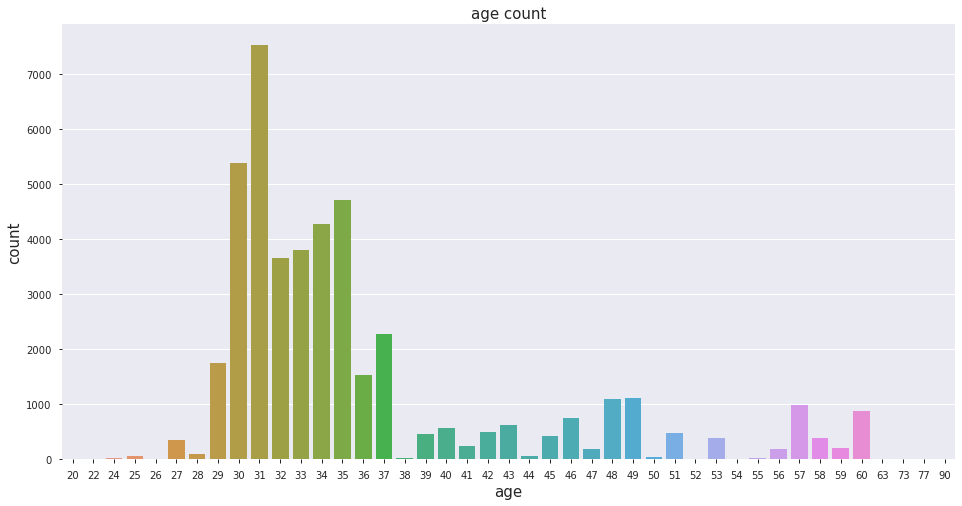

In [13]:
fig, ax = plt.subplots(figsize=(16,8))
sns.countplot(x='age', data=all_df)
ax.set_xlabel('age', fontsize=15)
ax.set_ylabel('count', fontsize=15)
ax.set_title('age count', fontsize=15)
sns.despine()

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


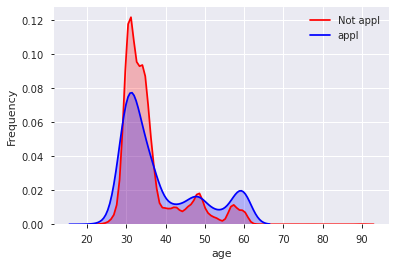

In [14]:
g = sns.kdeplot(x['age'][x['y'] == 0], color='red', shade = True)
g = sns.kdeplot(x['age'][x['y'] == 1], color='blue', shade = True)
g.set_xlabel('age')
g.set_ylabel('Frequency')
g = g.legend(['Not appl','appl'])

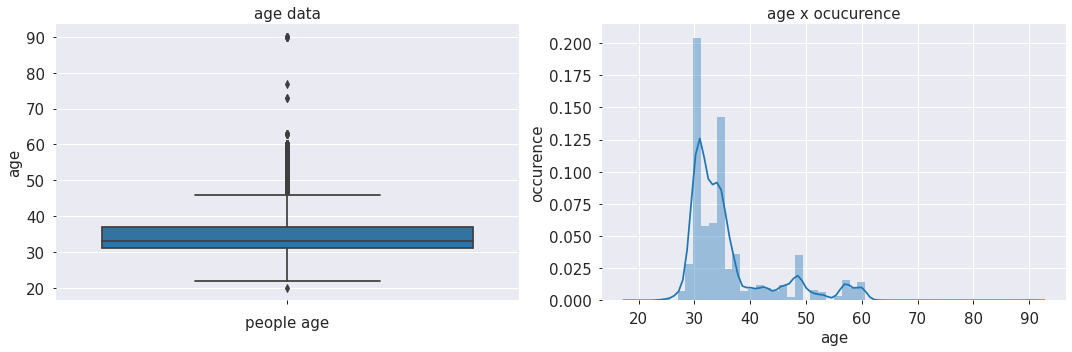

In [15]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x='age', data=all_df, orient='v', ax=ax1)
ax1.set_xlabel('people age', fontsize=15)
ax1.set_ylabel('age', fontsize=15)
ax1.set_title('age data', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(all_df['age'], ax=ax2)
sns.despine(ax=ax2)
ax2.set_xlabel('age', fontsize=15)
ax2.set_ylabel('occurence', fontsize=15)
ax2.set_title('age x ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [16]:
print('1º Quartile: ', all_df['age'].quantile(q = 0.25))
print('2º Quartile: ', all_df['age'].quantile(q = 0.50))
print('3º Quartile: ', all_df['age'].quantile(q = 0.75))
print('4º Quartile: ', all_df['age'].quantile(q = 1.00))
    
print('Ages above: ', all_df['age'].quantile(q = 0.75) + 
                      1.5*(all_df['age'].quantile(q = 0.75) - all_df['age'].quantile(q = 0.25)), 'are outliers')

1º Quartile:  31.0
2º Quartile:  33.0
3º Quartile:  37.0
4º Quartile:  90.0
Ages above:  46.0 are outliers


In [17]:
def age_class(age):
    a = ''
    if age <= 31:
        a = 0
    elif age <= 33:
        a = 1
    elif age <= 37:
        a = 2
    elif age <= 46:
        a = 3
    else:
        a = 4
    return a

In [18]:
x['age_class'] = x['age'].map(age_class)
test_df['age_class'] = test_df['age'].map(age_class)
all_df['age_class'] = all_df['age'].map(age_class)

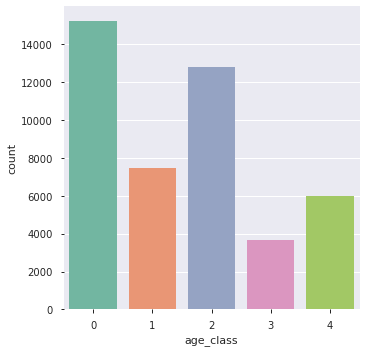

In [19]:
sns.catplot(x='age_class', kind='count', palette=('Set2'), data=all_df)

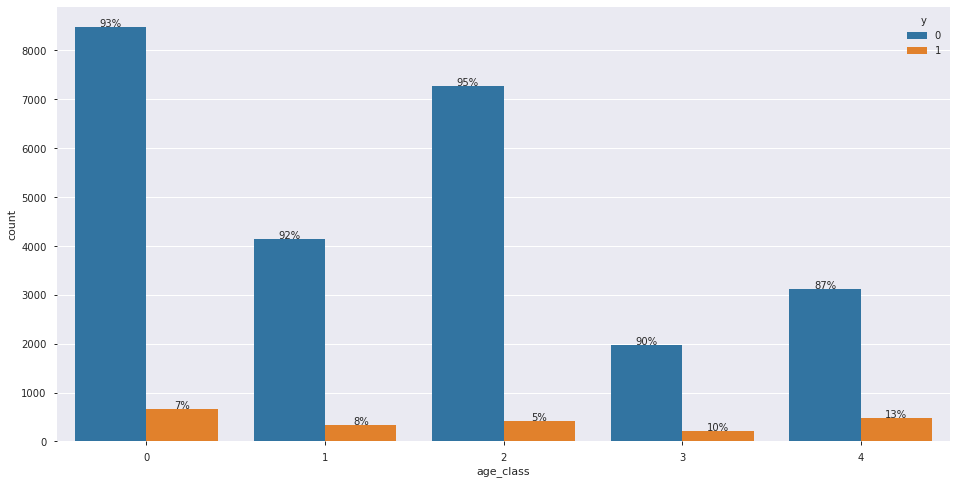

In [20]:
plt.figure(figsize=(16,8))
ax = sns.countplot(x='age_class', data=x ,hue='y')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 10, '{0:.0%}'.format(height_l/total), ha='center')
    ax.text(right.get_x() + right.get_width()/2., height_r + 10, '{0:.0%}'.format(height_r/total), ha='center')

# ・JOB

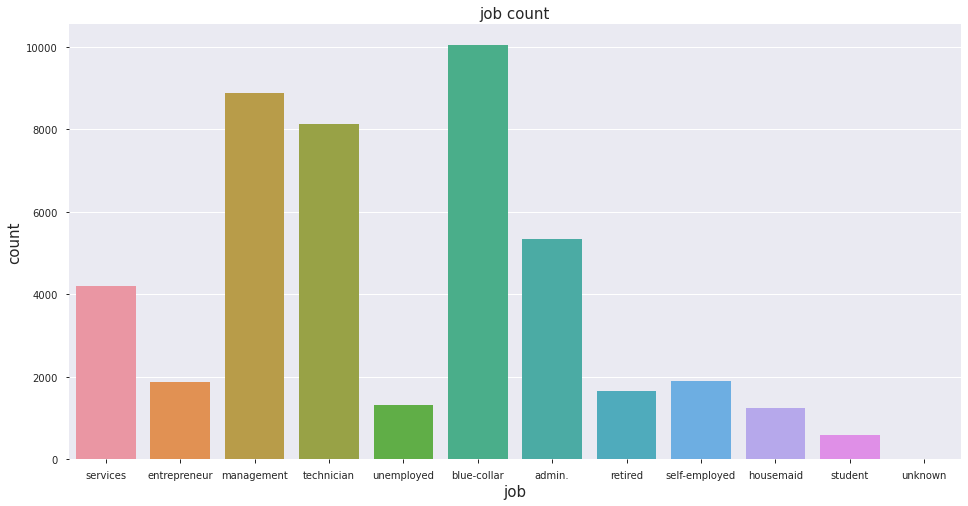

In [21]:
fig, ax = plt.subplots(figsize=(16,8))
sns.countplot(x='job', data=all_df)
ax.set_xlabel('job', fontsize=15)
ax.set_ylabel('count', fontsize=15)
ax.set_title('job count', fontsize=15)
sns.despine()

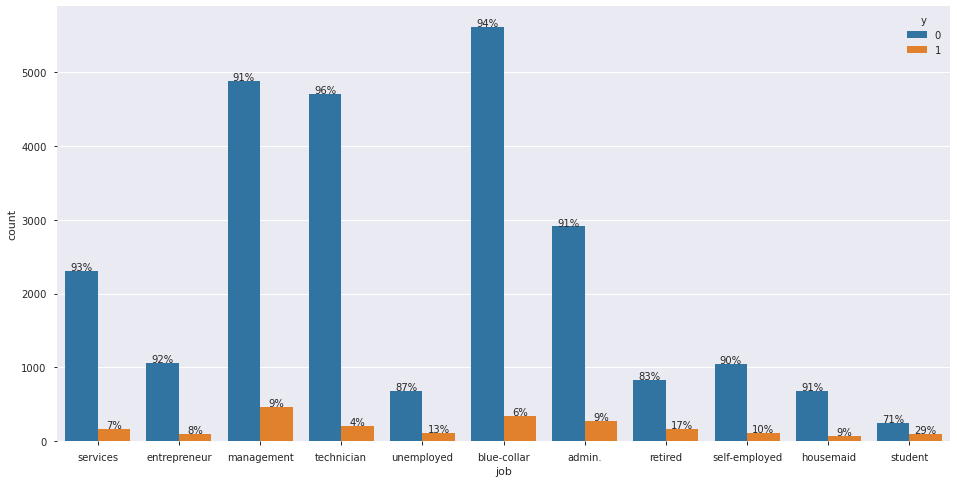

In [22]:
plt.figure(figsize=(16,8))
ax = sns.countplot(x='job', data=x ,hue='y')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 10, '{0:.0%}'.format(height_l/total), ha='center')
    ax.text(right.get_x() + right.get_width()/2., height_r + 10, '{0:.0%}'.format(height_r/total), ha='center')

In [23]:
x['is_student'] = [1 if i == 'student' else 0 for i in x['job']]
test_df['is_student'] = [1 if i == 'student' else 0 for i in test_df['job']]
all_df['is_student'] = [1 if i == 'student' else 0 for i in all_df['job']]

In [24]:
x['is_retired'] = [1 if i == 'retired' else 0 for i in x['job']]
test_df['is_retired'] = [1 if i == 'retired' else 0 for i in test_df['job']]
all_df['is_retired'] = [1 if i == 'retired' else 0 for i in all_df['job']]

In [25]:
x['is_unemployed'] = [1 if i == 'unemployed' else 0 for i in x['job']]
test_df['is_unemployed'] = [1 if i == 'unemployed' else 0 for i in test_df['job']]
all_df['is_unemployed'] = [1 if i == 'unemployed' else 0 for i in all_df['job']]

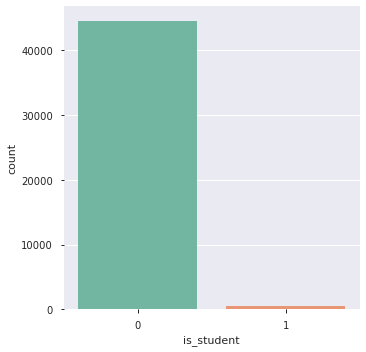

In [26]:
sns.catplot(x='is_student', kind='count', palette=('Set2'), data=all_df)

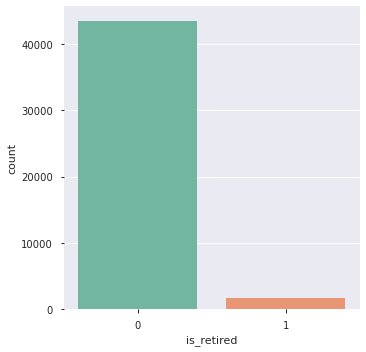

In [27]:
sns.catplot(x='is_retired', kind='count', palette=('Set2'), data=all_df)

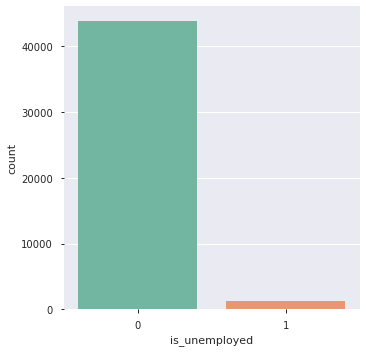

In [28]:
sns.catplot(x='is_unemployed', kind='count', palette=('Set2'), data=all_df)

# ・MARITAL

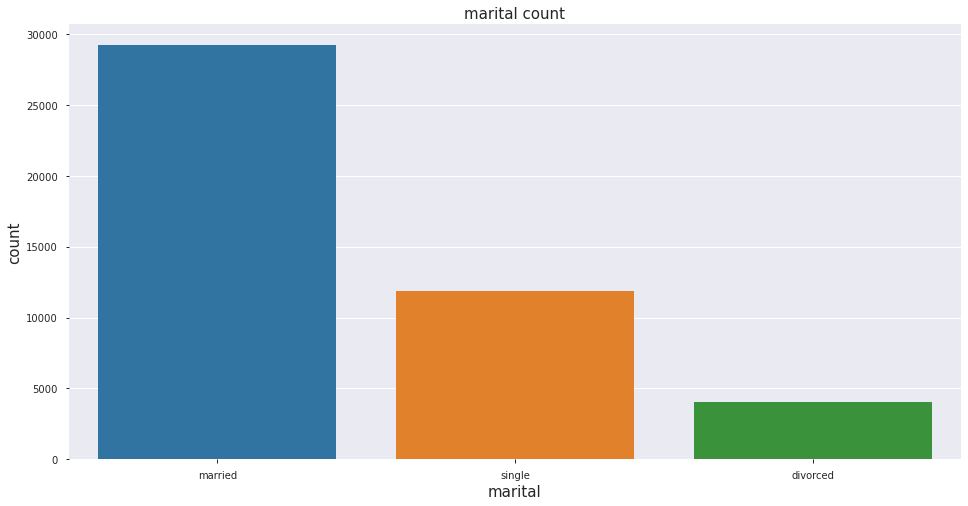

In [29]:
fig, ax = plt.subplots(figsize=(16,8))
sns.countplot(x='marital', data=all_df)
ax.set_xlabel('marital', fontsize=15)
ax.set_ylabel('count', fontsize=15)
ax.set_title('marital count', fontsize=15)
sns.despine()

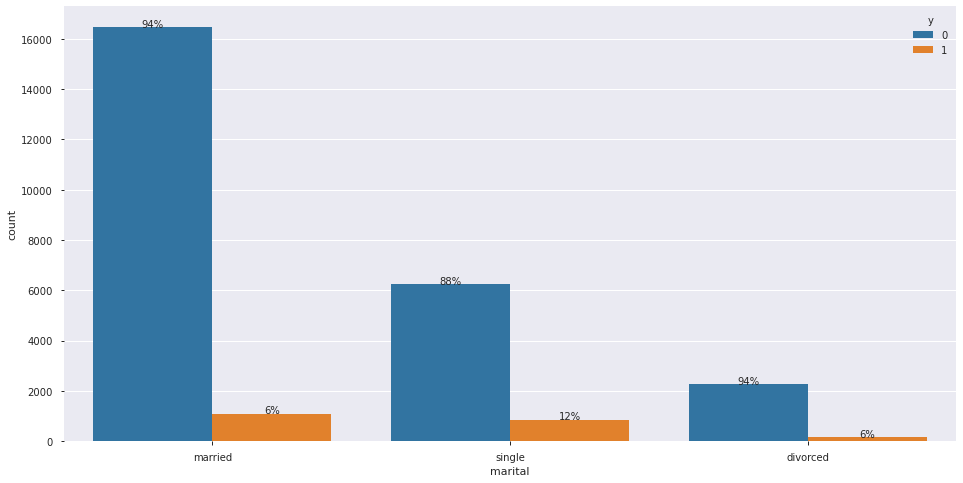

In [30]:
plt.figure(figsize=(16,8))
ax = sns.countplot(x='marital', data=x ,hue='y')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 10, '{0:.0%}'.format(height_l/total), ha='center')
    ax.text(right.get_x() + right.get_width()/2., height_r + 10, '{0:.0%}'.format(height_r/total), ha='center')

# ・EDUCATION

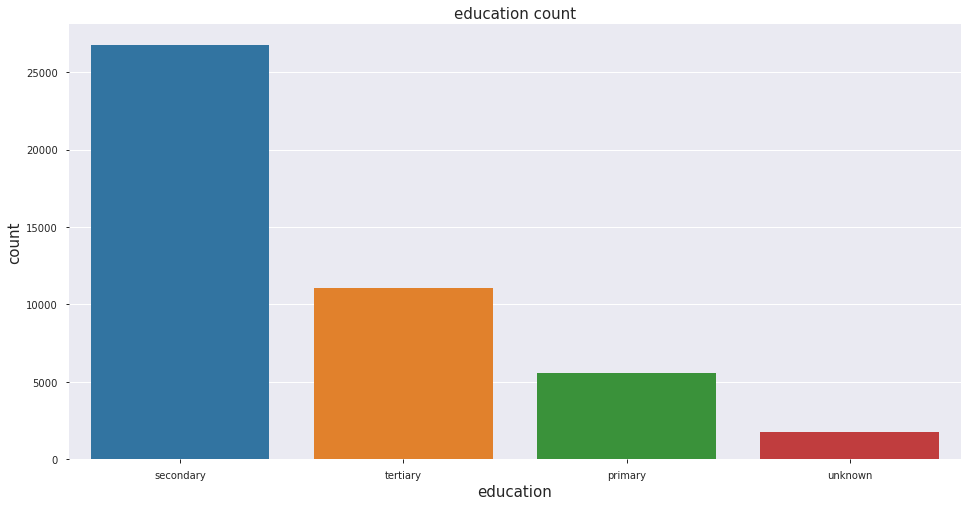

In [31]:
fig, ax = plt.subplots(figsize=(16,8))
sns.countplot(x='education', data=all_df)
ax.set_xlabel('education', fontsize=15)
ax.set_ylabel('count', fontsize=15)
ax.set_title('education count', fontsize=15)
sns.despine()

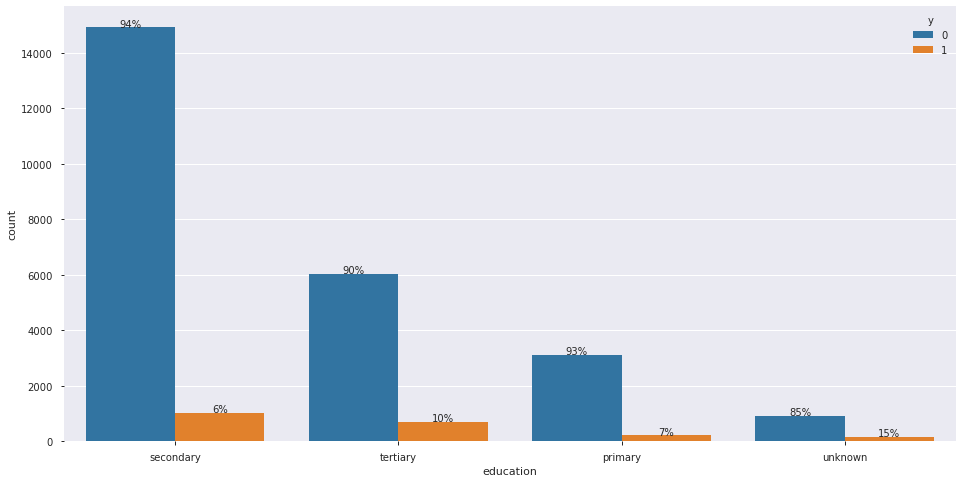

In [32]:
plt.figure(figsize=(16,8))
ax = sns.countplot(x='education', data=x ,hue='y')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 10, '{0:.0%}'.format(height_l/total), ha='center')
    ax.text(right.get_x() + right.get_width()/2., height_r + 10, '{0:.0%}'.format(height_r/total), ha='center')

# ・DEFAULT, HOUSING, LOAN

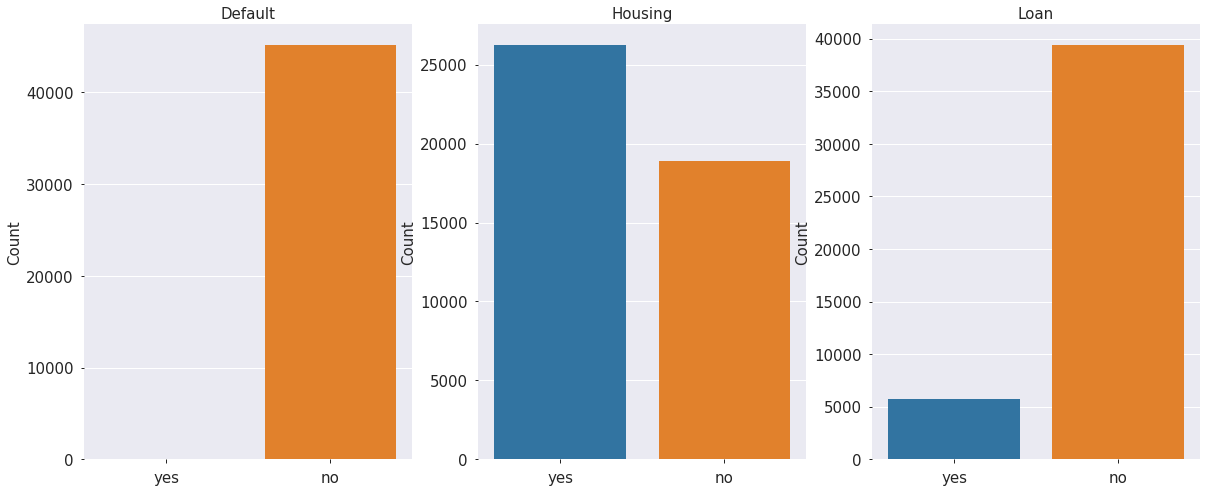

In [33]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,8))
sns.countplot(x='default', data=all_df, ax=ax1, order=['yes', 'no'])
ax1.set_title('Default', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

sns.countplot(x='housing', data=all_df, ax=ax2, order=['yes', 'no'])
ax2.set_title('Housing', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)

sns.countplot(x='loan', data=all_df, ax=ax3, order=['yes', 'no'])
ax3.set_title('Loan', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)

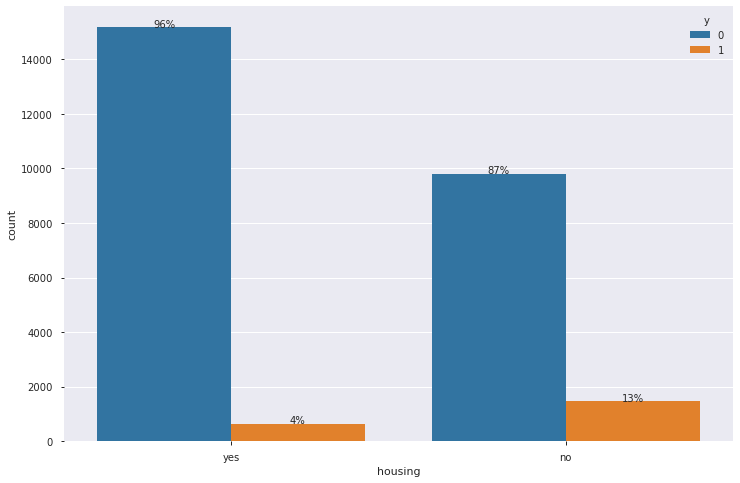

In [34]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x='housing', data=x ,hue='y')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 10, '{0:.0%}'.format(height_l/total), ha='center')
    ax.text(right.get_x() + right.get_width()/2., height_r + 10, '{0:.0%}'.format(height_r/total), ha='center')

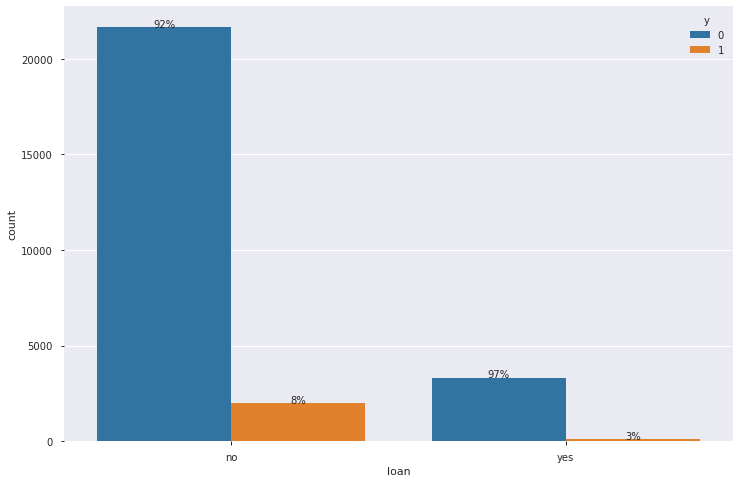

In [35]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x='loan', data=x ,hue='y')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 10, '{0:.0%}'.format(height_l/total), ha='center')
    ax.text(right.get_x() + right.get_width()/2., height_r + 10, '{0:.0%}'.format(height_r/total), ha='center')

# ・MONTH, DAY, DURATION, PDAYS

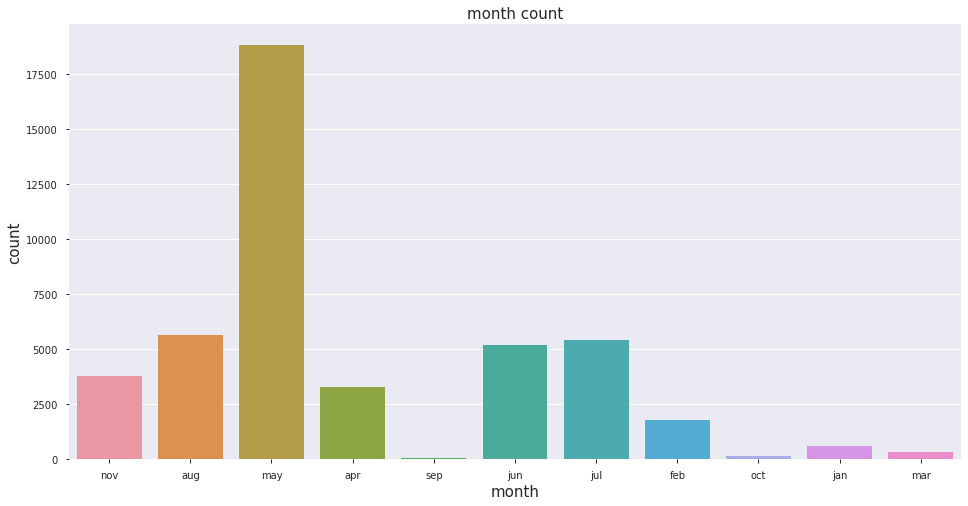

In [36]:
fig, ax = plt.subplots(figsize=(16,8))
sns.countplot(x='month', data=all_df)
ax.set_xlabel('month', fontsize=15)
ax.set_ylabel('count', fontsize=15)
ax.set_title('month count', fontsize=15)
sns.despine()

In [37]:
month_dict = {"jan": 1, "feb": 2, "mar": 3, "apr": 4, "may": 5, "jun": 6, 
              "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12}

x['month'] = x['month'].map(month_dict)
x['month'] = x['month'].map(int, month_dict)

test_df['month'] = test_df['month'].map(month_dict)
test_df['month'] = test_df['month'].map(int, month_dict)

all_df['month'] = all_df['month'].map(month_dict)
all_df['month'] = all_df['month'].map(int, month_dict)

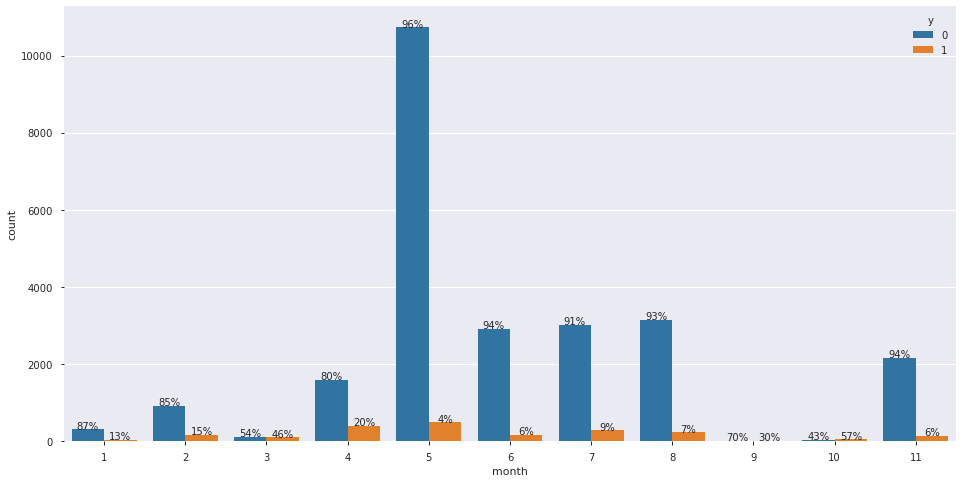

In [38]:
plt.figure(figsize=(16,8))
ax = sns.countplot(x='month', data=x ,hue='y')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 10, '{0:.0%}'.format(height_l/total), ha='center')
    ax.text(right.get_x() + right.get_width()/2., height_r + 10, '{0:.0%}'.format(height_r/total), ha='center')

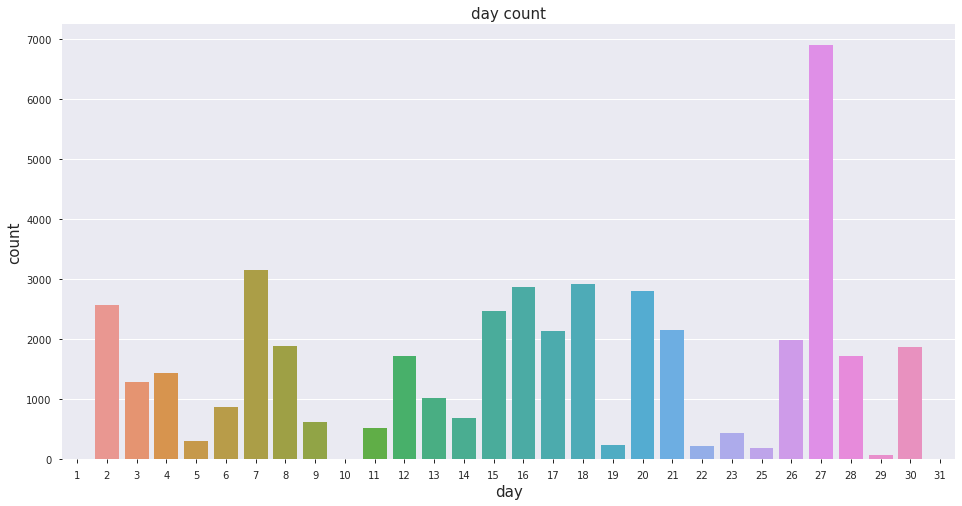

In [40]:
fig, ax = plt.subplots(figsize=(16,8))
sns.countplot(x='day', data=all_df)
ax.set_xlabel('day', fontsize=15)
ax.set_ylabel('count', fontsize=15)
ax.set_title('day count', fontsize=15)
sns.despine()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


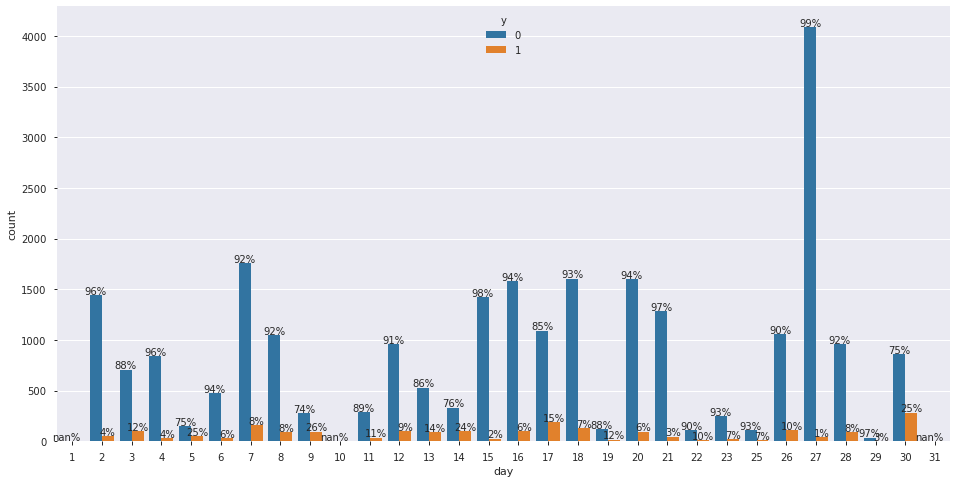

In [41]:
plt.figure(figsize=(16,8))
ax = sns.countplot(x='day', data=x ,hue='y')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 10, '{0:.0%}'.format(height_l/total), ha='center')
    ax.text(right.get_x() + right.get_width()/2., height_r + 10, '{0:.0%}'.format(height_r/total), ha='center')

In [42]:
def day_class(day):
    a = ''
    if day <= 10:
        a = 0
    elif day <= 20:
        a = 1
    else:
        a =2
    return a

In [44]:
x['day_class'] = x['day'].map(day_class)
test_df['day_class'] = test_df['day'].map(day_class)
all_df['day_class'] = all_df['day'].map(day_class)

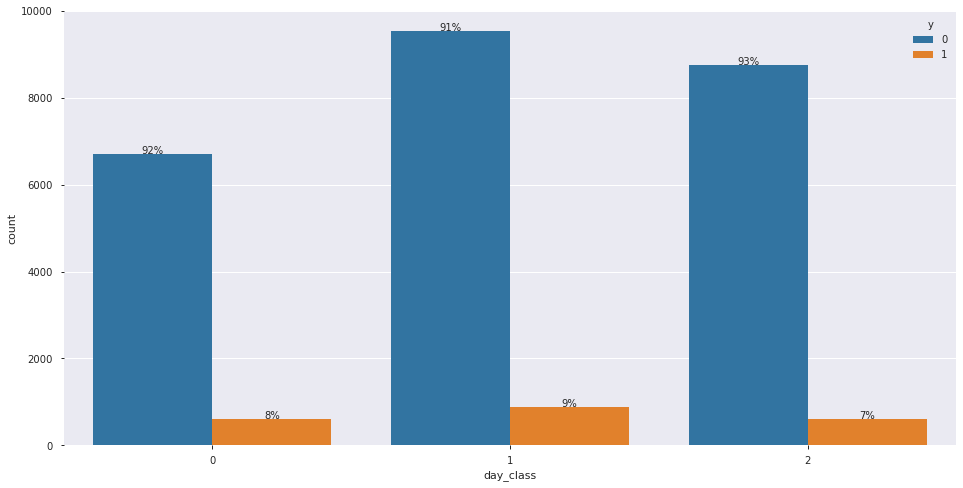

In [45]:
plt.figure(figsize=(16,8))
ax = sns.countplot(x='day_class', data=x ,hue='y')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 10, '{0:.0%}'.format(height_l/total), ha='center')
    ax.text(right.get_x() + right.get_width()/2., height_r + 10, '{0:.0%}'.format(height_r/total), ha='center')

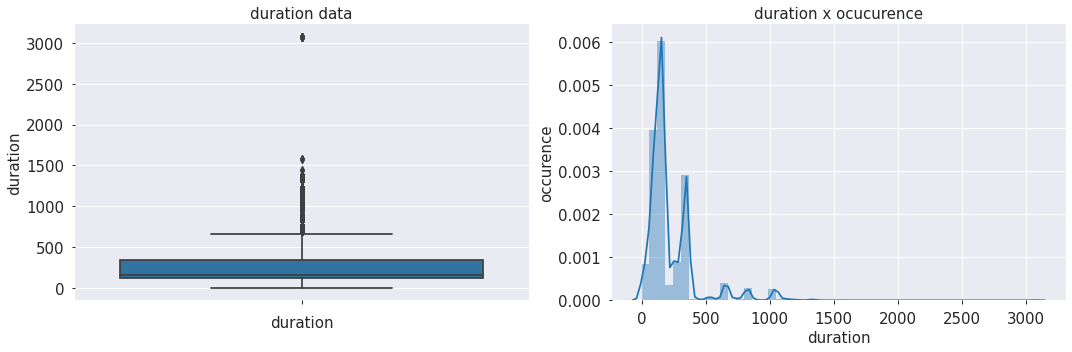

In [53]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x='duration', data=all_df, orient='v', ax=ax1)
ax1.set_xlabel('duration', fontsize=15)
ax1.set_ylabel('duration', fontsize=15)
ax1.set_title('duration data', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(all_df['duration'], ax=ax2)
sns.despine(ax=ax2)
ax2.set_xlabel('duration', fontsize=15)
ax2.set_ylabel('occurence', fontsize=15)
ax2.set_title('duration x ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [56]:
print('1º Quartile: ', all_df['duration'].quantile(q = 0.25))
print('2º Quartile: ', all_df['duration'].quantile(q = 0.50))
print('3º Quartile: ', all_df['duration'].quantile(q = 0.75))
print('4º Quartile: ', all_df['duration'].quantile(q = 1.00))
    
print('duration above: ', all_df['duration'].quantile(q = 0.75) + 
                      1.5*(all_df['duration'].quantile(q = 0.75) - all_df['duration'].quantile(q = 0.25)), 'are outliers')
print('min:{}, max:{}'.format(all_df['duration'].min(), all_df['duration'].max()))

1º Quartile:  121.0
2º Quartile:  158.0
3º Quartile:  345.0
4º Quartile:  3076.0
Ages above:  681.0 are outliers
min:0, max:3076


In [128]:
def duration_class(duration):
    a = ''
    if duration == 0:
        a = 0
    elif duration <= 300:
        a = 1
    elif duration <= 600:
        a = 2
    else:
        a = 3
    return a

In [129]:
x['duration_class'] = x['duration'].map(duration_class)
test_df['duration_class'] = test_df['duration'].map(duration_class)
all_df['duration_class'] = all_df['duration'].map(duration_class)

min:0, max:3


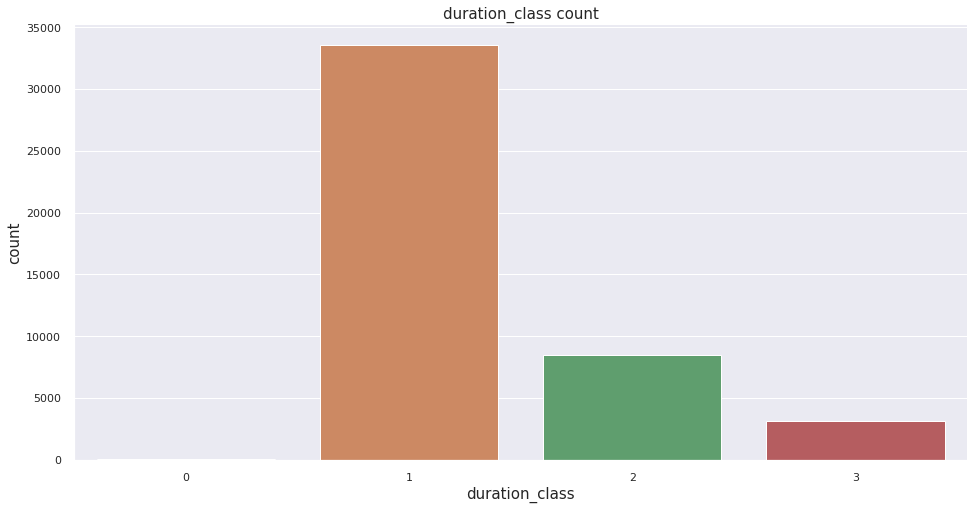

In [130]:
fig, ax = plt.subplots(figsize=(16,8))
sns.countplot(x='duration_class', data=all_df)
ax.set_xlabel('duration_class', fontsize=15)
ax.set_ylabel('count', fontsize=15)
ax.set_title('duration_class count', fontsize=15)
sns.despine()

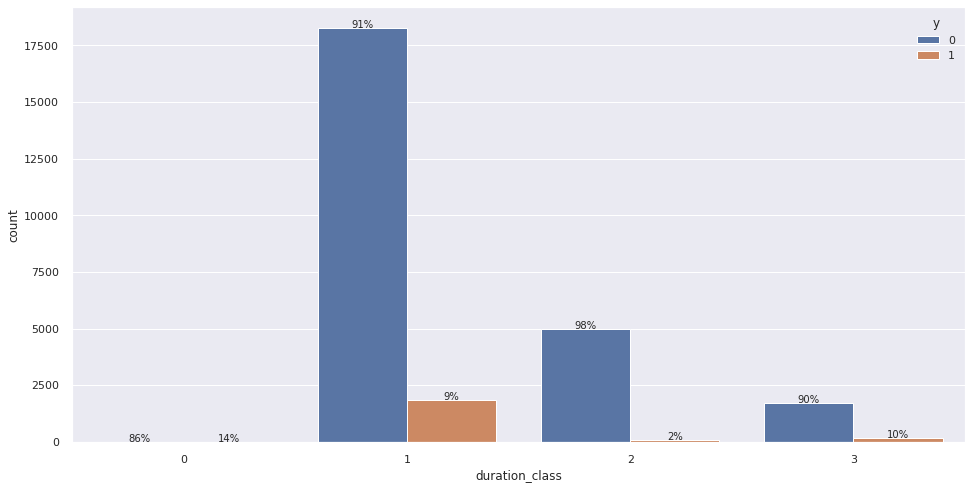

In [131]:
plt.figure(figsize=(16,8))
ax = sns.countplot(x='duration_class', data=x ,hue='y')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 10, '{0:.0%}'.format(height_l/total), ha='center')
    ax.text(right.get_x() + right.get_width()/2., height_r + 10, '{0:.0%}'.format(height_r/total), ha='center')

# ・BALANCE

In [64]:
balance_min = all_df['balance'].min()
balance_max = all_df['balance'].max()

print('min:{}, max:{}'.format(balance_min, balance_max))

min:-6847, max:102124


In [108]:
sturges = lambda n: math.ceil(math.log2(n*2))

In [110]:
print('bins:', sturges(len(all_df['balance'])))

bins: 17


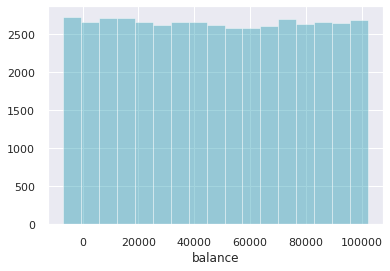

In [111]:
sns.distplot(all_df['balance'], bins=17, color='#1995ad', kde=False, rug=False)

# ・CAMPAIGN, PDAYS, PREVIOUS, POUTOCOME

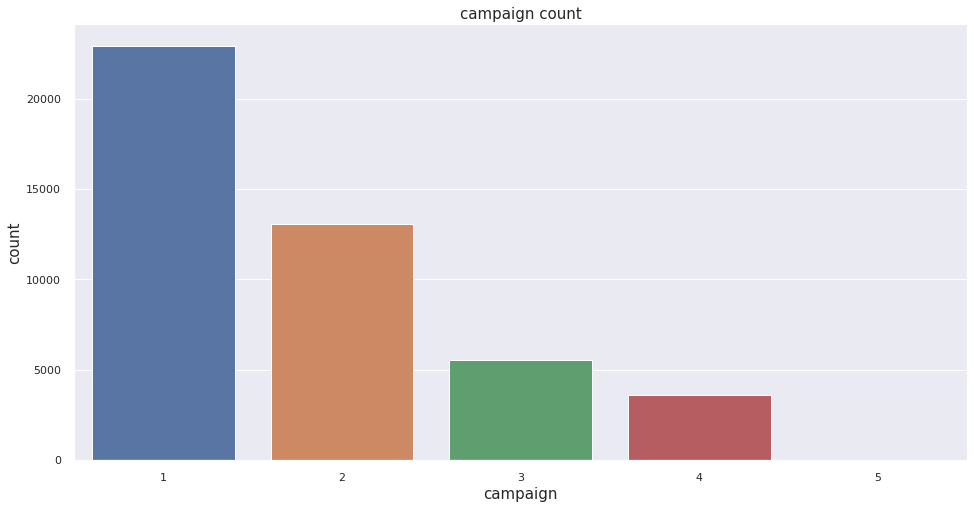

In [83]:
fig, ax = plt.subplots(figsize=(16,8))
sns.countplot(x='campaign', data=all_df)
ax.set_xlabel('campaign', fontsize=15)
ax.set_ylabel('count', fontsize=15)
ax.set_title('campaign count', fontsize=15)
sns.despine()

posx and posy should be finite values
posx and posy should be finite values


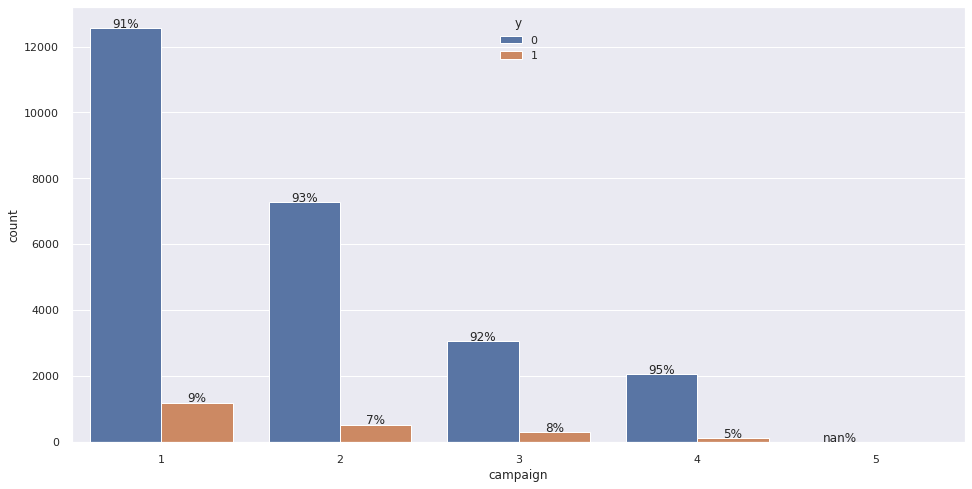

In [84]:
plt.figure(figsize=(16,8))
ax = sns.countplot(x='campaign', data=x ,hue='y')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 10, '{0:.0%}'.format(height_l/total), ha='center')
    ax.text(right.get_x() + right.get_width()/2., height_r + 10, '{0:.0%}'.format(height_r/total), ha='center')

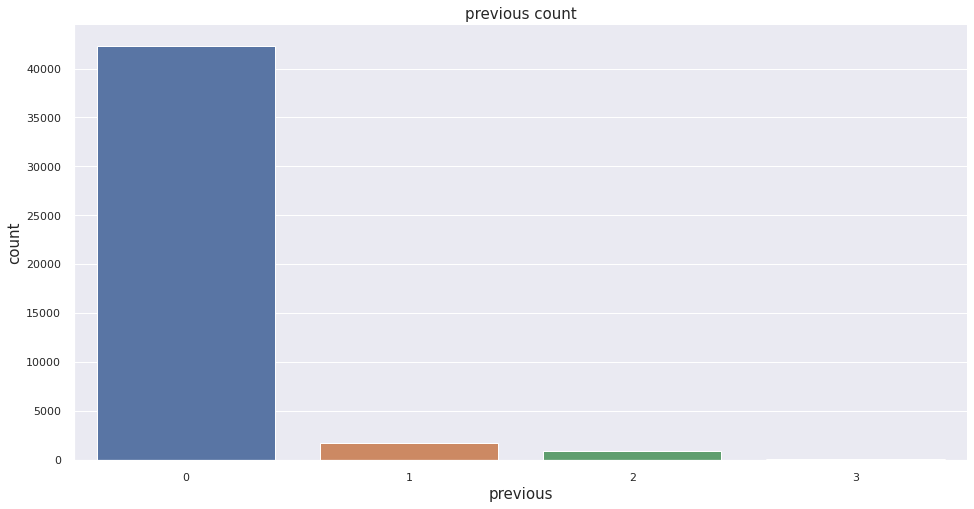

In [85]:
fig, ax = plt.subplots(figsize=(16,8))
sns.countplot(x='previous', data=all_df)
ax.set_xlabel('previous', fontsize=15)
ax.set_ylabel('count', fontsize=15)
ax.set_title('previous count', fontsize=15)
sns.despine()

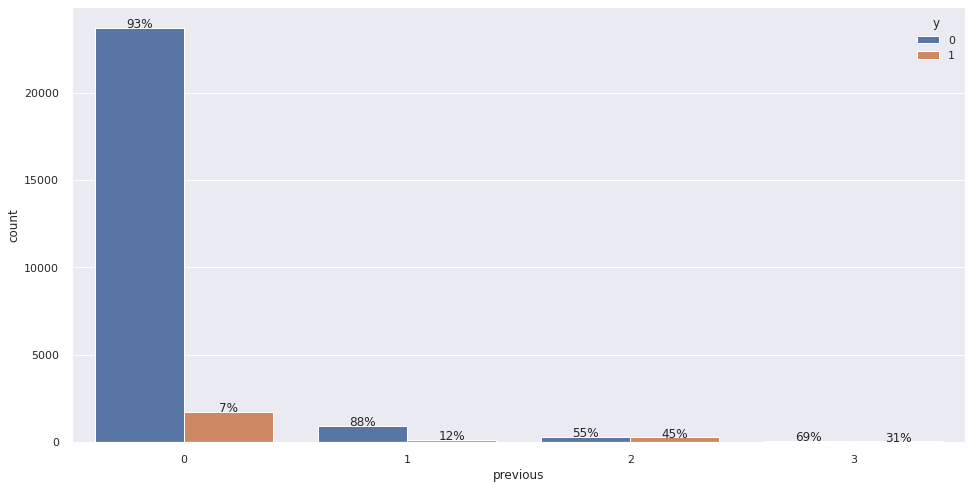

In [86]:
plt.figure(figsize=(16,8))
ax = sns.countplot(x='previous', data=x ,hue='y')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 10, '{0:.0%}'.format(height_l/total), ha='center')
    ax.text(right.get_x() + right.get_width()/2., height_r + 10, '{0:.0%}'.format(height_r/total), ha='center')

In [88]:
x['total_campaign'] = x.campaign + x.previous
test_df['total_campaign'] = test_df.campaign + test_df.previous
all_df['total_campaign'] = all_df.campaign + all_df.previous

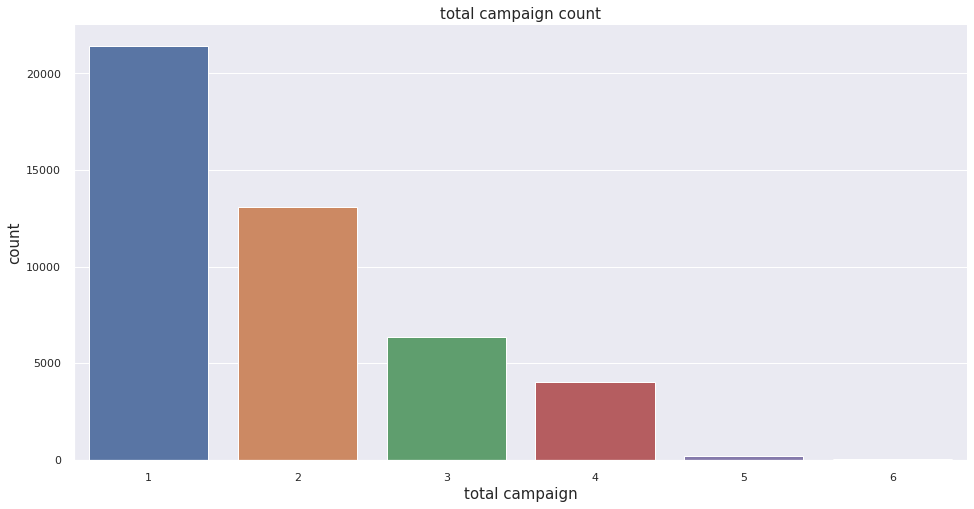

In [89]:
fig, ax = plt.subplots(figsize=(16,8))
sns.countplot(x='total_campaign', data=all_df)
ax.set_xlabel('total campaign', fontsize=15)
ax.set_ylabel('count', fontsize=15)
ax.set_title('total campaign count', fontsize=15)
sns.despine()

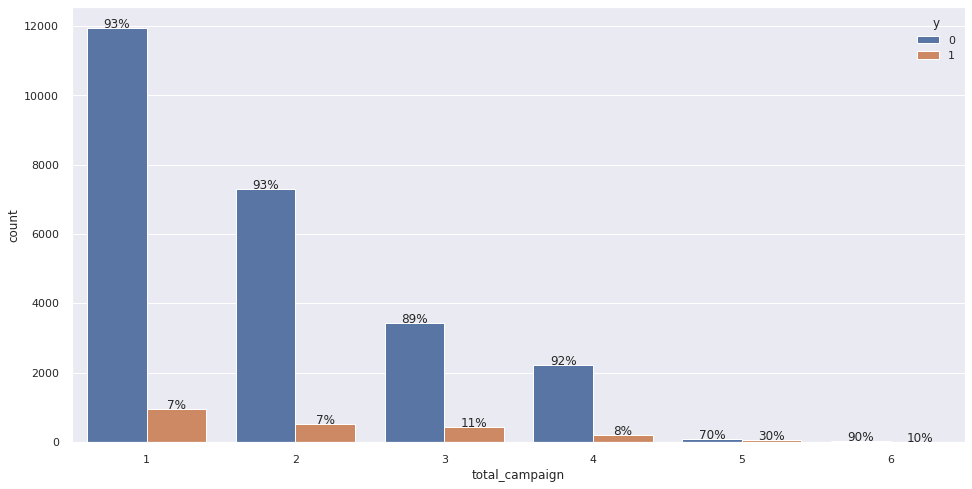

In [90]:
plt.figure(figsize=(16,8))
ax = sns.countplot(x='total_campaign', data=x ,hue='y')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 10, '{0:.0%}'.format(height_l/total), ha='center')
    ax.text(right.get_x() + right.get_width()/2., height_r + 10, '{0:.0%}'.format(height_r/total), ha='center')

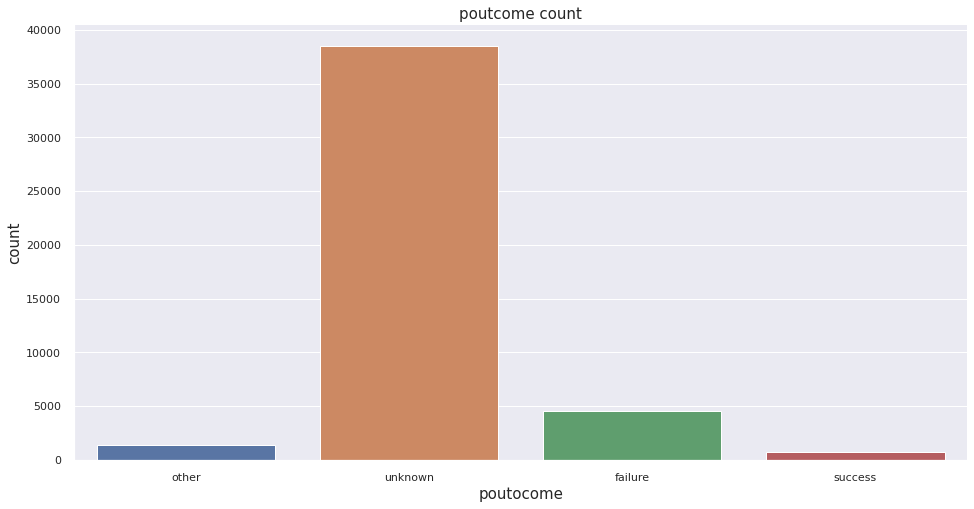

In [91]:
fig, ax = plt.subplots(figsize=(16,8))
sns.countplot(x='poutcome', data=all_df)
ax.set_xlabel('poutocome', fontsize=15)
ax.set_ylabel('count', fontsize=15)
ax.set_title('poutcome count', fontsize=15)
sns.despine()

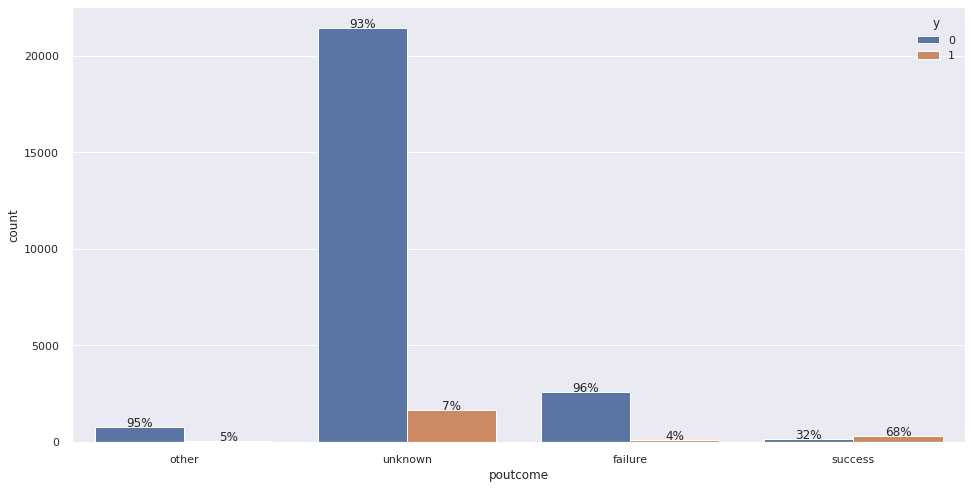

In [92]:
plt.figure(figsize=(16,8))
ax = sns.countplot(x='poutcome', data=x ,hue='y')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 10, '{0:.0%}'.format(height_l/total), ha='center')
    ax.text(right.get_x() + right.get_width()/2., height_r + 10, '{0:.0%}'.format(height_r/total), ha='center')

In [93]:
x['is_success'] = [1 if i == 'success' else 0 for i in x['poutcome']]
test_df['is_success'] = [1 if i == 'success' else 0 for i in test_df['poutcome']]
all_df['is_success'] = [1 if i == 'success' else 0 for i in all_df['poutcome']]

In [104]:
print('bins:', sturges(len(all_df['pdays'])))

bins: 17


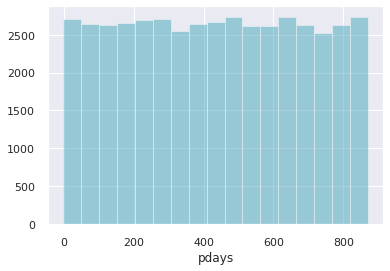

In [106]:
sns.distplot(all_df['pdays'], bins=17, color='#1995ad', kde=False, rug=False)

In [112]:
print('1º Quartile: ', all_df['pdays'].quantile(q = 0.25))
print('2º Quartile: ', all_df['pdays'].quantile(q = 0.50))
print('3º Quartile: ', all_df['pdays'].quantile(q = 0.75))
print('4º Quartile: ', all_df['pdays'].quantile(q = 1.00))
    
print('pdays above: ', all_df['pdays'].quantile(q = 0.75) + 
                      1.5*(all_df['pdays'].quantile(q = 0.75) - all_df['pdays'].quantile(q = 0.25)), 'are outliers')
print('min:{}, max:{}'.format(all_df['pdays'].min(), all_df['pdays'].max()))

1º Quartile:  216.0
2º Quartile:  434.0
3º Quartile:  652.0
4º Quartile:  870.0
pdays above:  1306.0 are outliers
min:-1, max:870


# <相関>

In [ ]:
x_tmp = copy(x)

In [ ]:
x_tmp.head()

In [ ]:
x_tmp.info()

In [ ]:
x_tmp = x[['month_class', 'day_class', 'age_class', 'duration_class', 'y']]

In [ ]:
corr = x_tmp.corr()
sns.heatmap(corr, square=True, annot=True, cmap="YlGnBu")

In [ ]:
del x_tmp, corr

# <数値変換>

In [ ]:
x.info()

In [ ]:
test_df.info()

In [ ]:
drop_col = ['month', 'day', 'duration', 'age', 'campaign', 'poutcome']

x = x.drop(columns=drop_col)

train_df = train_data.drop(columns=drop_col)
test_df = test_df.drop(columns=drop_col)

In [ ]:
main_df = pd.concat([x, test_df], ignore_index=True)

In [ ]:
num_features = ['balance']

for col in num_features:
    scaler = StandardScaler()
    scaler.fit(np.array(main_df[col].values).reshape(-1, 1))
    x[col] = scaler.transform(np.array(train_df[col].values).reshape(-1, 1))
    
for col in num_features:
    scaler = StandardScaler()
    scaler.fit(np.array(main_df[col].values).reshape(-1, 1))
    test_df[col] = scaler.transform(np.array(test_df[col].values).reshape(-1, 1))

In [ ]:
cat_features = ['job', 'marital', 'education', 'default', 'housing', 'loan',
               'contact']

for col in cat_features:
    cat = set(x[col].unique().tolist() + test_df[col].unique().tolist())
    
    x[col] = pd.Categorical(x[col], categories=cat)
    test_df[col] = pd.Categorical(test_df[col], categories=cat)

In [ ]:
x = pd.get_dummies(x, drop_first=True)
test_df = pd.get_dummies(test_df, drop_first=True)

In [ ]:
x.info()

In [ ]:
test_df.info()

In [ ]:
now = datetime.datetime.now()

fname_x = 'dataset/train_' + now.strftime('%d_%H%M') + '.csv'
fname_test = 'dataset/test_' + now.strftime('%d_%H%M') + '.csv'

x.to_csv(fname_x, index=False)
test_df.to_csv(fname_test, index=False)